## Credit card Default Use Case

Acme Bank is an internationally renowned bank which has been in the Indian banking sector since the past two decades. In the last year, they have started offering a premium travel credit card in association with AirIndia. Typically, the credit card business has been a profitable one for Acme. However, the Acme travel card has not registered profit so far. This is a worrying trend for the CEO as the overall Acme portfolio is stagnant and they were hoping to find new customers by targeting a more premium clientele.
A closer evaluation of the balance sheet shows that an average of 20% revenue is being lost monthly due to credit card default. If this revenue leakage is stopped, then the CEO believes that this card could become one of the most profitable product offerings in the company's portfolio.
As part of a specialized analytics firm, you are called in to assess if the cardholders’ past data and history can be used to predict default. If one is able to predict default even a month before its' occurrence, significant revenue savings can be made
You are provided with a consolidated database of individual customers and their credit history (refer to the file sent by email, “acme_bank_data.csv”)
The data team has also provided you with a data dictionary (“acme_bank_data_dictionnary.csv”)

### 1. Import the dataset into R

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
pd.set_option('display.max_columns', None)

In [17]:
df=pd.read_csv('acme_bank_data_v2.csv')

### 2. Take a look at the dataset, what would be some of the first checks you would do?

In [18]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0,689,0,0,0,0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0,1000,1000,1000,0,2000,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518,1500,1000,1000,1000,5000,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000,2019,1200,1100,1069,1000,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000,36681,10000,9000,689,679,0


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,29872.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29954.000000,29988.000000,2.998400e+04,29996.000000,29994.000000,29996.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167410.607927,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51224.648862,49165.453982,4.701809e+04,43262.566242,40314.996866,38868.813475,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129721.364116,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73619.488423,71132.443959,6.935518e+04,64336.673193,60802.116583,59555.613569,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.250000,2984.750000,2.667750e+03,2324.500000,1763.250000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22383.000000,21194.500000,2.008950e+04,19051.000000,18104.500000,17068.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67113.500000,64006.250000,6.016950e+04,54506.000000,50208.500000,49177.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   29872 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   29954 non-null  float64
 13  BILL_AMT2                   299

In [12]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
IS_MALE                       0
dtype: int64

**********ID*******


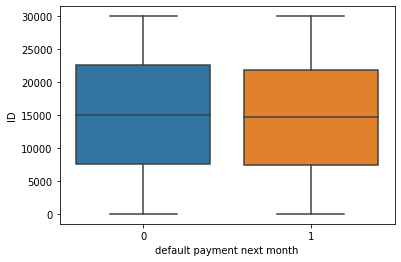

**********LIMIT_BAL*******


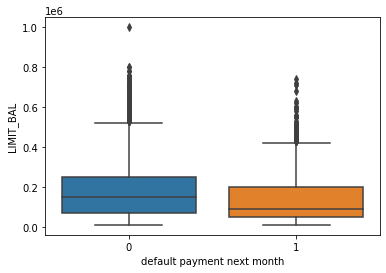

**********SEX*******


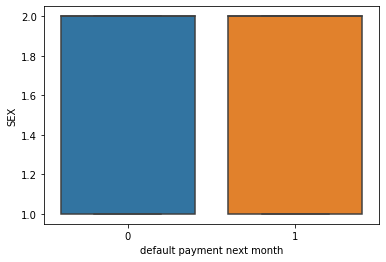

**********EDUCATION*******


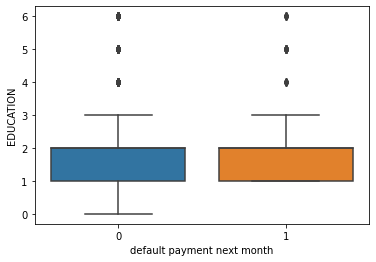

**********MARRIAGE*******


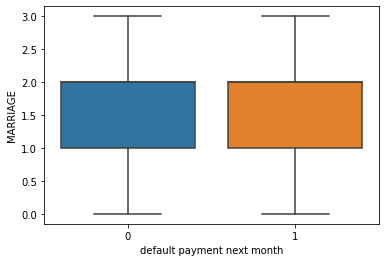

**********AGE*******


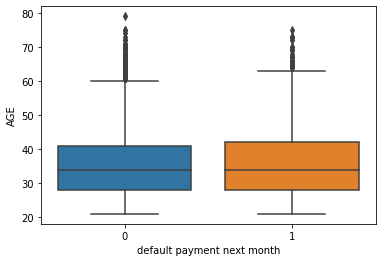

**********PAY_0*******


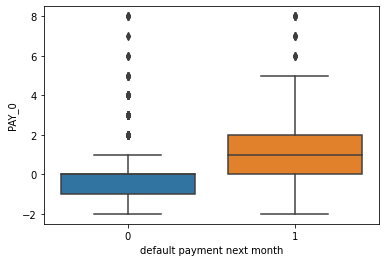

**********PAY_2*******


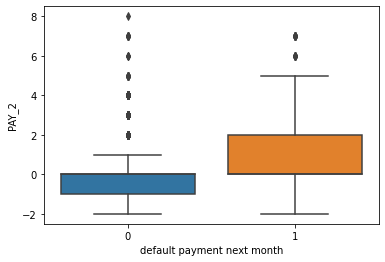

**********PAY_3*******


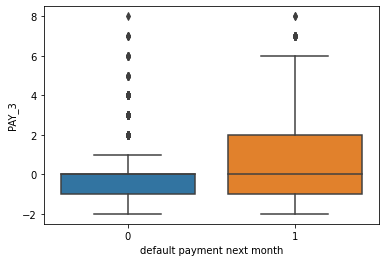

**********PAY_4*******


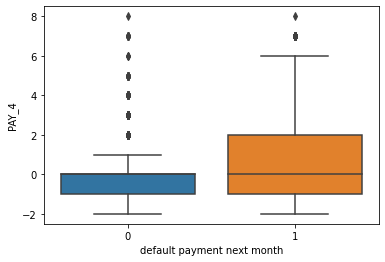

**********PAY_5*******


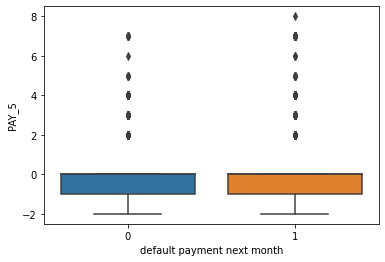

**********PAY_6*******


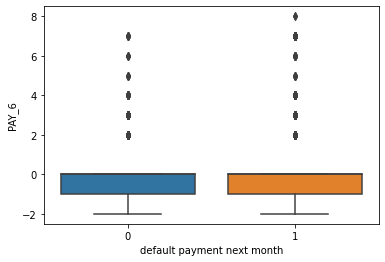

**********BILL_AMT1*******


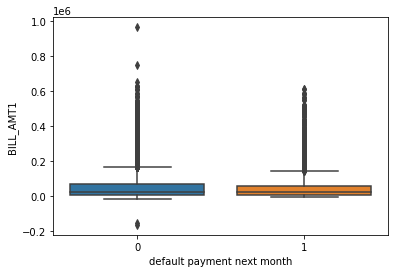

**********BILL_AMT2*******


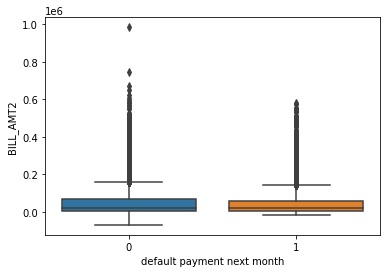

**********BILL_AMT3*******


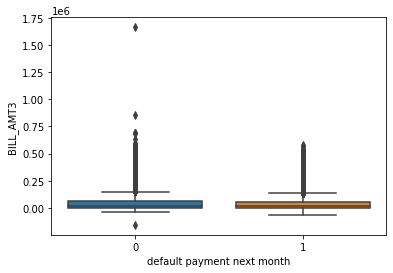

**********BILL_AMT4*******


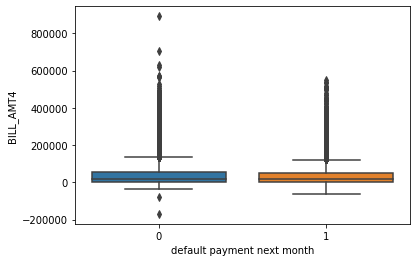

**********BILL_AMT5*******


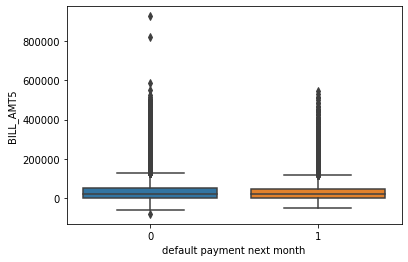

**********BILL_AMT6*******


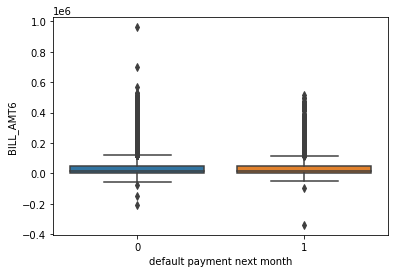

**********PAY_AMT1*******


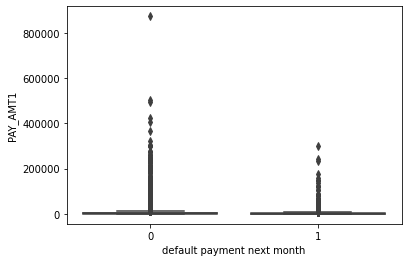

**********PAY_AMT2*******


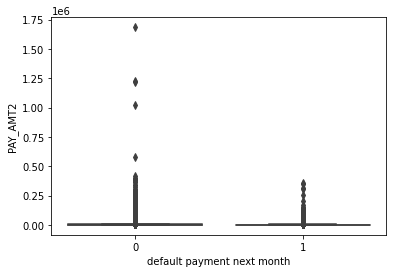

**********PAY_AMT3*******


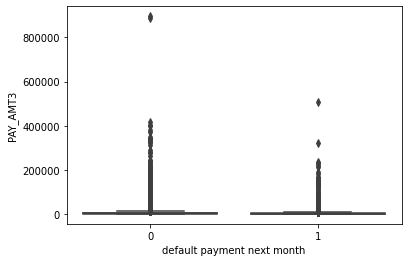

**********PAY_AMT4*******


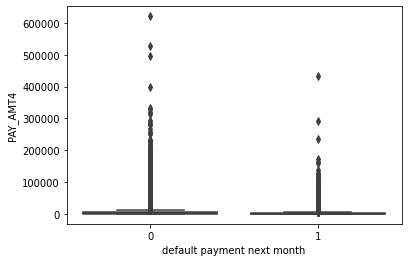

**********PAY_AMT5*******


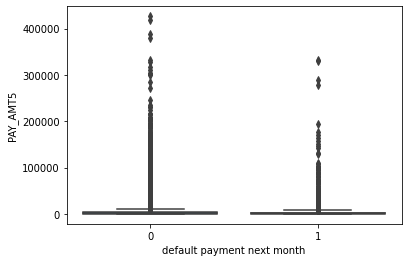

**********PAY_AMT6*******


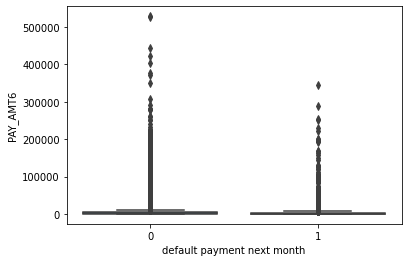

**********default payment next month*******


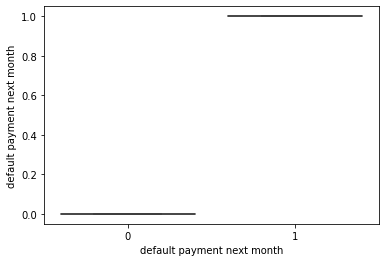

In [ ]:
for i in df.columns:
    print(f'**********{i}*******')
    sns.boxplot(data=df,y=i,x='default payment next month')
    plt.show()

**********ID*******


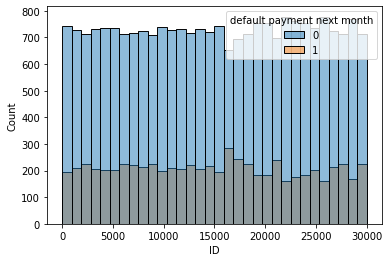

**********LIMIT_BAL*******


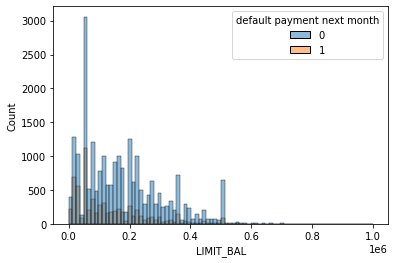

**********SEX*******


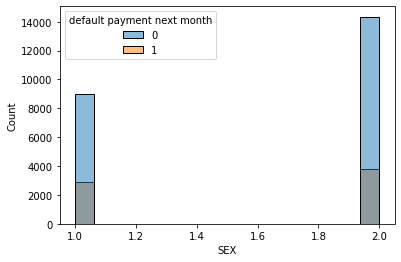

**********EDUCATION*******


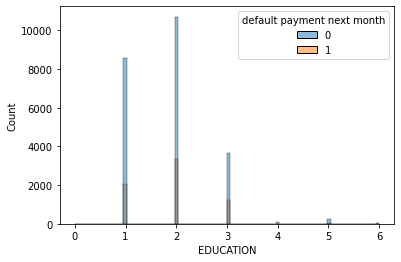

**********MARRIAGE*******


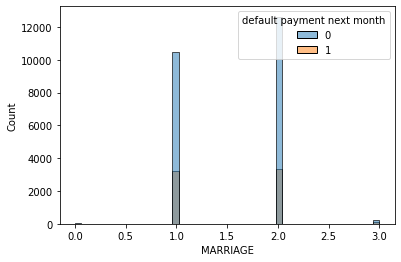

**********AGE*******


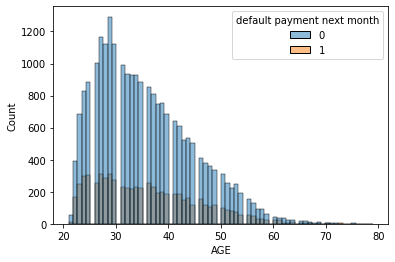

**********PAY_0*******


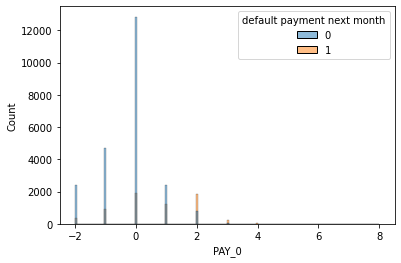

**********PAY_2*******


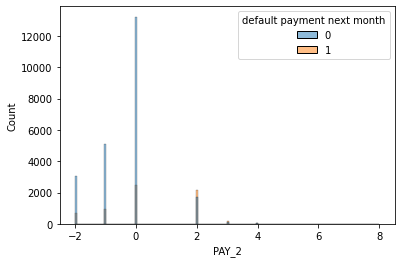

**********PAY_3*******


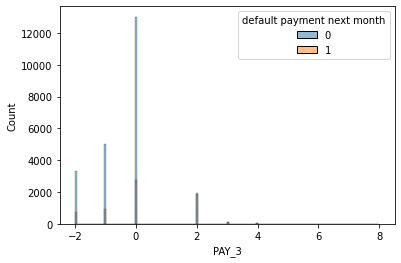

**********PAY_4*******


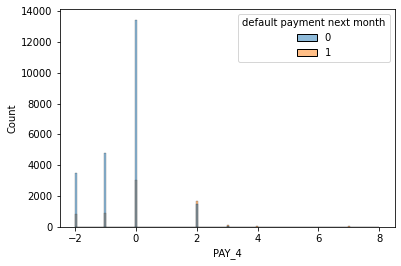

**********PAY_5*******


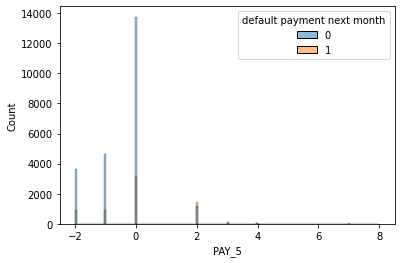

**********PAY_6*******


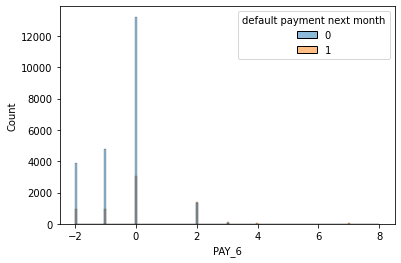

**********BILL_AMT1*******


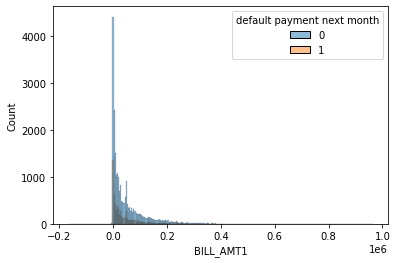

**********BILL_AMT2*******


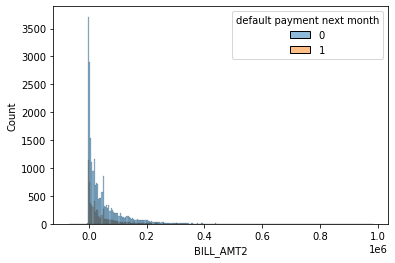

**********BILL_AMT3*******


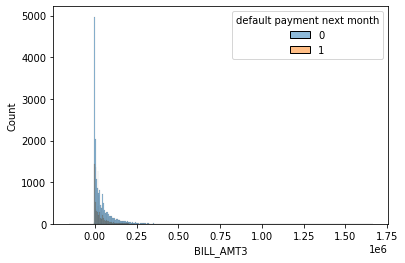

**********BILL_AMT4*******


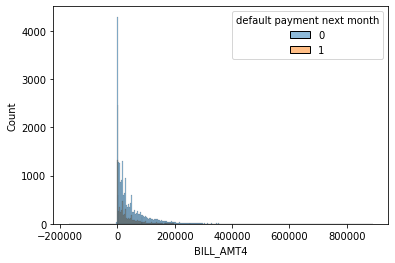

**********BILL_AMT5*******


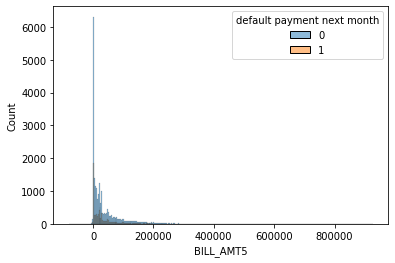

**********BILL_AMT6*******


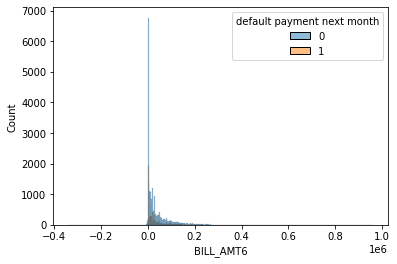

**********PAY_AMT1*******


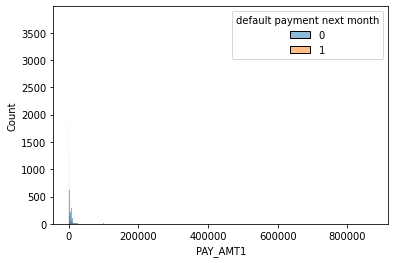

**********PAY_AMT2*******


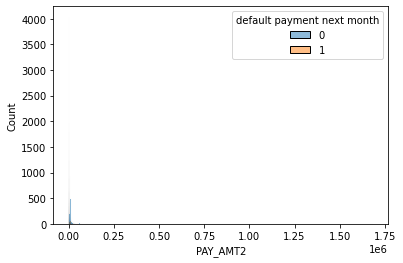

**********PAY_AMT3*******


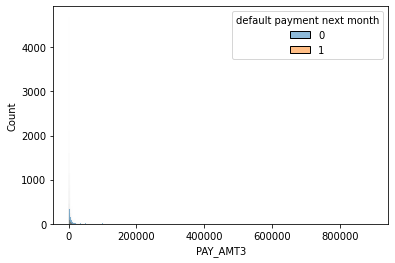

**********PAY_AMT4*******


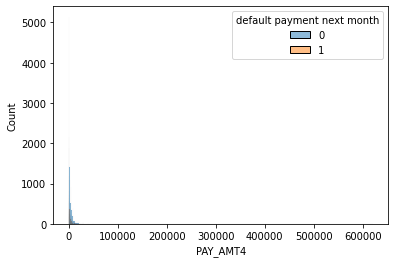

**********PAY_AMT5*******


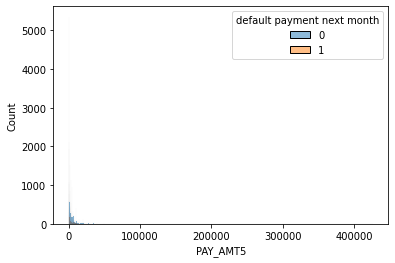

**********PAY_AMT6*******


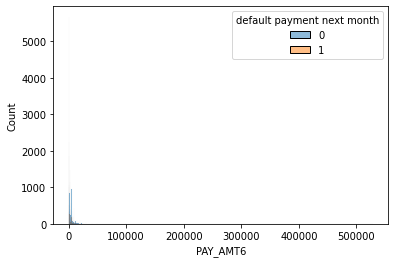

**********default payment next month*******


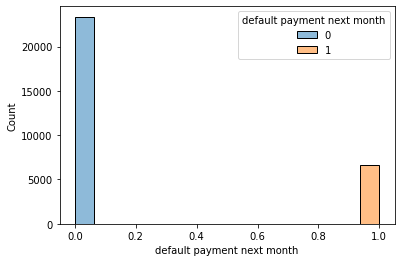

**********IS_MALE*******


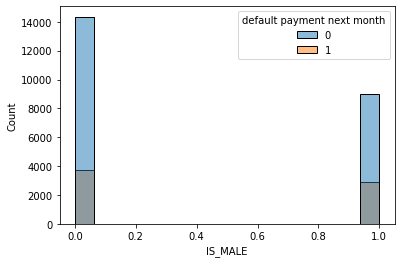

In [14]:
for i in df.columns:
    print(f'**********{i}*******')
    sns.histplot(data=df,x=i,hue='default payment next month')
    plt.show()

### 3. In the dataset, are there any missing values? How will you treat them?

In [28]:
df.isna().sum()

ID                              0
LIMIT_BAL                     128
SEX                             0
EDUCATION                       0
MARRIAGE                        0
AGE                             0
PAY_0                           0
PAY_2                           0
PAY_3                           0
PAY_4                           0
PAY_5                           0
PAY_6                           0
BILL_AMT1                      46
BILL_AMT2                      12
BILL_AMT3                      16
BILL_AMT4                       4
BILL_AMT5                       6
BILL_AMT6                       4
PAY_AMT1                        0
PAY_AMT2                        0
PAY_AMT3                        0
PAY_AMT4                        0
PAY_AMT5                        0
PAY_AMT6                        0
default payment next month      0
dtype: int64

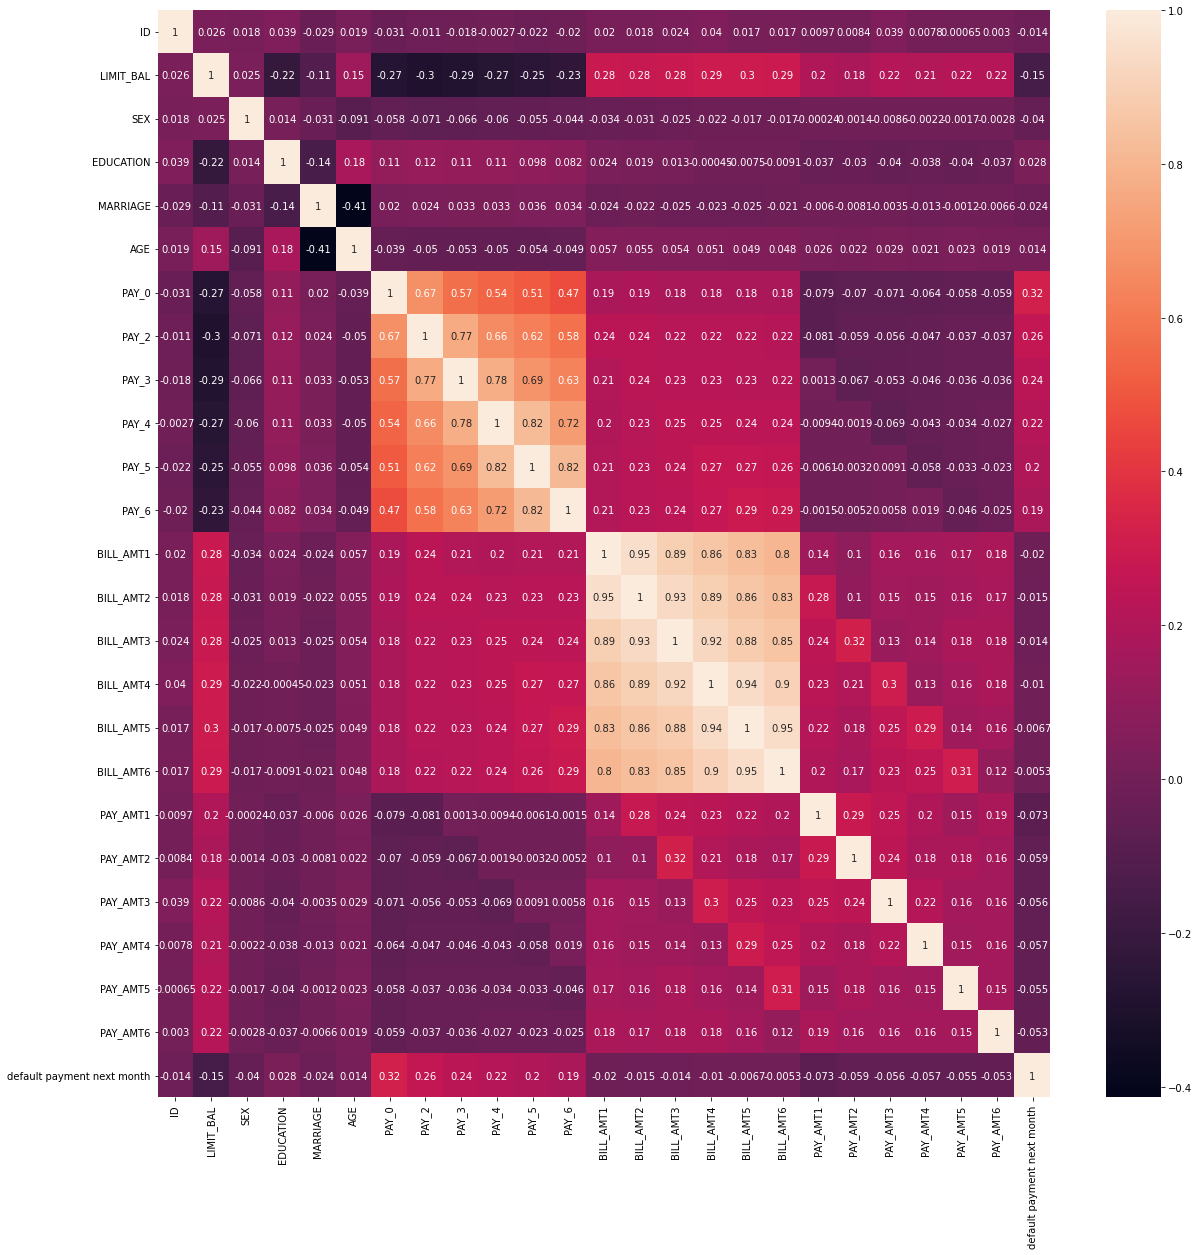

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [29]:
df[df['LIMIT_BAL'].isna()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
21,22,NaN,2,2,1,39,-1,-1,-1,-1,-1,-1,316.0,316.0,316.0,0.0,632.0,316.0,316,316,0,632,316,0,1
211,212,NaN,2,1,1,38,1,-2,-1,0,-1,-1,0.0,0.0,250.0,123.0,789.0,1222.0,0,250,0,789,1222,9616,1
649,650,NaN,2,2,2,46,8,7,6,5,4,3,21075.0,20795.0,20206.0,19617.0,18737.0,18148.0,0,0,0,0,0,0,0
1085,1086,NaN,2,2,1,43,0,0,2,0,0,0,108616.0,114854.0,105275.0,107561.0,105502.0,103813.0,9600,0,4000,3765,4000,4200,0
1161,1162,NaN,2,2,1,44,-2,-2,-2,-2,-2,-2,5990.0,1677.0,2920.0,2683.0,1674.0,3273.0,1677,2920,2683,1674,3273,2749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28718,28719,NaN,2,1,1,45,-1,-1,-1,-1,-1,-1,291.0,291.0,291.0,291.0,291.0,291.0,291,291,291,291,291,291,0
29575,29576,NaN,1,2,2,38,2,0,0,0,0,0,58190.0,59615.0,60379.0,56921.0,18050.0,18385.0,3000,3100,1409,631,1000,664,1
29594,29595,NaN,1,1,1,44,-1,-1,-1,-1,-1,-1,396.0,396.0,396.0,396.0,396.0,396.0,396,396,396,396,396,396,1
29613,29614,NaN,1,1,1,39,0,0,0,0,0,0,192257.0,192560.0,198501.0,194782.0,191172.0,193267.0,7004,10061,7071,6514,7081,10121,0


In [34]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

def model_eval_summary(y_test,predictions):
    print(f'accuracy : {accuracy_score(y_test,predictions)}')
    print(f'auc : {roc_auc_score(y_test,predictions)}')
    print(f'recall : {recall_score(y_test,predictions)}')
    print(f'precission : {precision_score(y_test,predictions)}')
    print(f'F1 : {f1_score(y_test,predictions)}')
    print(f'confusion_matrix : {confusion_matrix(y_test,predictions)}')


# IMPUTATION OF NAN
df=df.fillna(-1)

# FIXING THE -2 IN PAY COLUMNS
for i in ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']:
    df[i]= df[i].apply(lambda x : -1 if x==-2 else x)
print(df)

# ONE HOT ENCODING FOR CATEGORICAL VAR
df['IS_MALE']=df.SEX.apply(lambda x: 1 if x==1 else 0)
categorical_cols=['EDUCATION','MARRIAGE']
ohe=OneHotEncoder()
array_hot_encoded = ohe.fit_transform(df[categorical_cols]).toarray()
df1=pd.concat([df.drop(columns=categorical_cols),pd.DataFrame(array_hot_encoded, index=df.index)], axis=1)

# FEATURE ENGINEERING


# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['default payment next month','ID']), df1['default payment next month'], test_size=0.33, random_state=42,stratify=df1['default payment next month'])

# MODEL
model=BalancedRandomForestClassifier(n_estimators=200,n_jobs=-1)
model.fit(X_train,y_train)
predictions=model.predict(X_test)

model_eval_summary(y_test,predictions)




          ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  B

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


accuracy : 0.7464646464646465
auc : 0.7040047616509425
recall : 0.6278538812785388
precission : 0.44788273615635177
F1 : 0.5228136882129277
confusion_matrix : [[6015 1695]
 [ 815 1375]]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

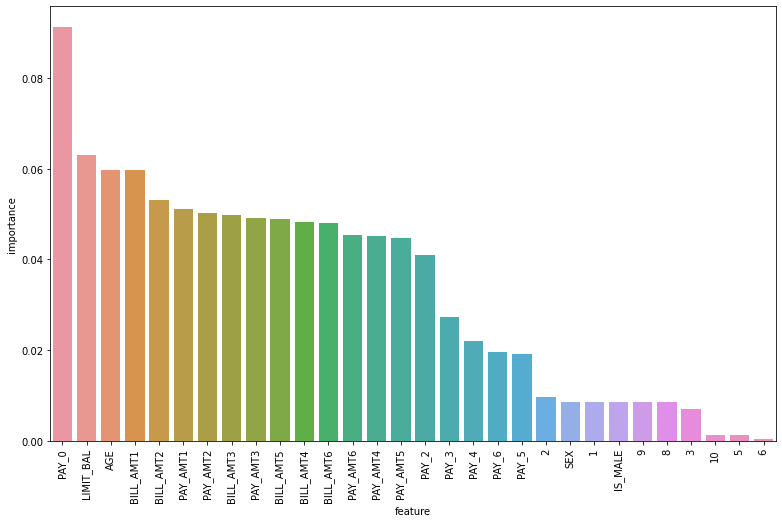

In [33]:
fimp= pd.DataFrame({'feature': X_train.columns,'importance': model.feature_importances_})
fimp=fimp.sort_values('importance',ascending=False)
plt.figure(figsize=(13,8))
sns.barplot(data=fimp.head(30),x='feature',y='importance')
plt.xticks(rotation=90)
